Option 1:
Stock Price: 61.5054566389779
Strike Price: 87.3940022117207
Time to Expiration: 1.7129843807152367 years
Risk-Free Rate: 0.010205181962578278
Volatility: 0.3859120662960225
Black-Scholes Price: 5.5027981355068505
Binomial Tree Price: 11.993792175870148
Monte Carlo Price: 5.015912925108119
------------------------


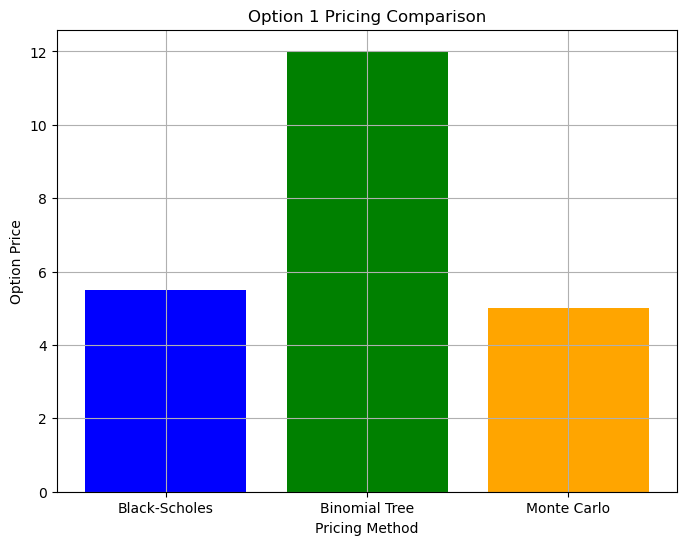

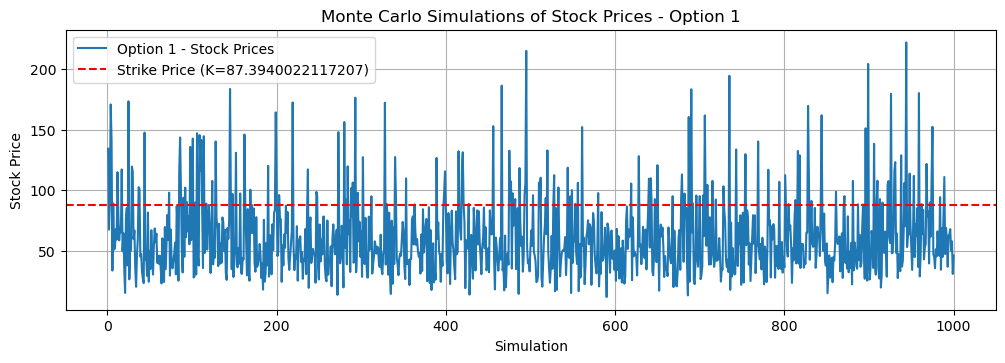

Option 2:
Stock Price: 110.90665392794814
Strike Price: 136.24565423543999
Time to Expiration: 1.9457836737272372 years
Risk-Free Rate: 0.03172810061121624
Volatility: 0.22358589501590764
Black-Scholes Price: 7.7530277952692686
Binomial Tree Price: 6.721768239961749
Monte Carlo Price: 7.144069661972725
------------------------


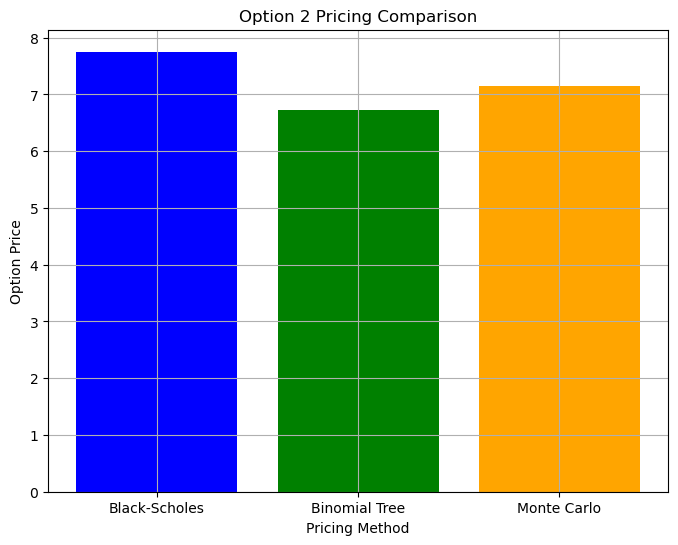

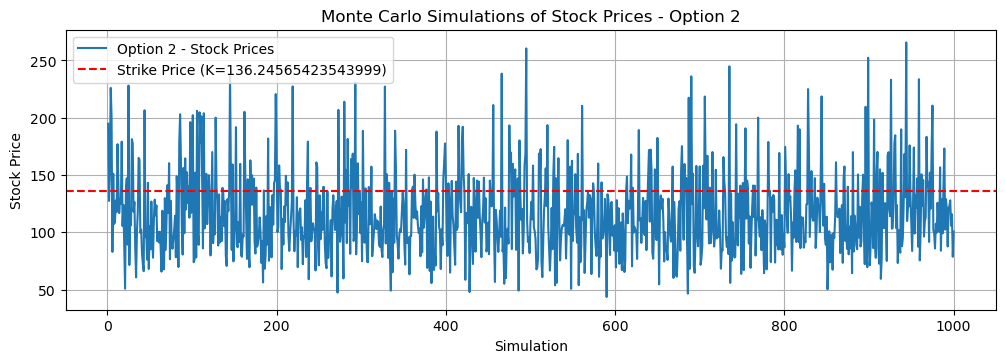

Option 3:
Stock Price: 63.33909641859883
Strike Price: 70.53053510318551
Time to Expiration: 0.8322161373507624 years
Risk-Free Rate: 0.029023854680290125
Volatility: 0.3595051361821545
Black-Scholes Price: 6.128892620578352
Binomial Tree Price: 8.077421637737421
Monte Carlo Price: 5.6142684382017585
------------------------


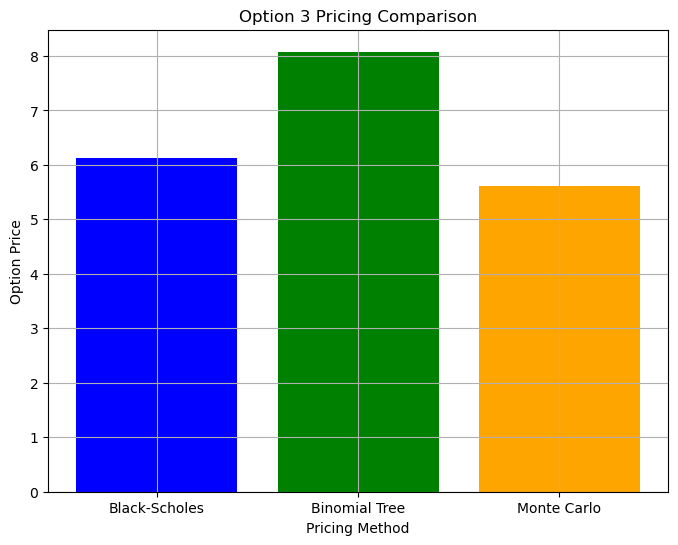

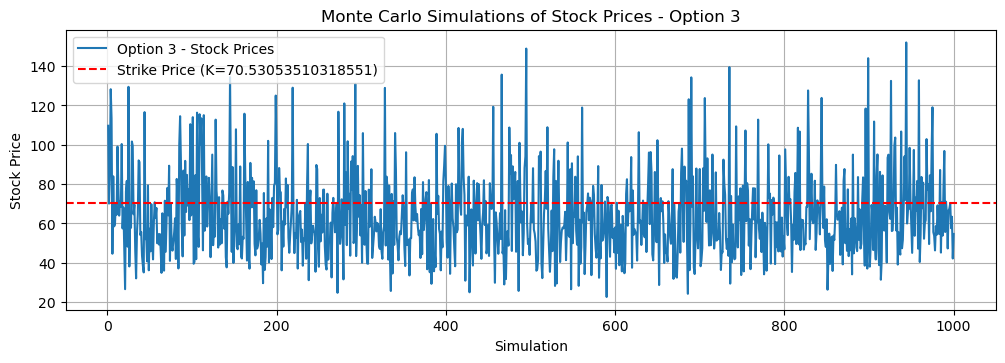

Option 4:
Stock Price: 74.05896199653488
Strike Price: 46.82619239813822
Time to Expiration: 1.913527437706464 years
Risk-Free Rate: 0.03545494710286091
Volatility: 0.3016531838428529
Black-Scholes Price: 31.460748214310158
Binomial Tree Price: 34.17710809251412
Monte Carlo Price: 29.965352536615512
------------------------


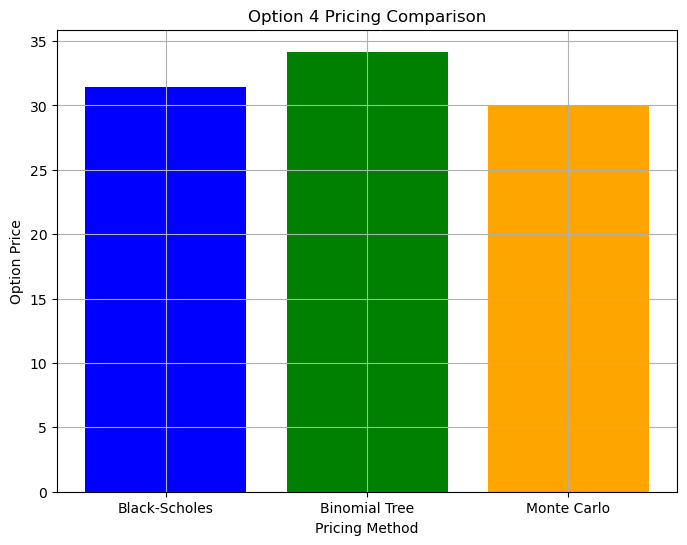

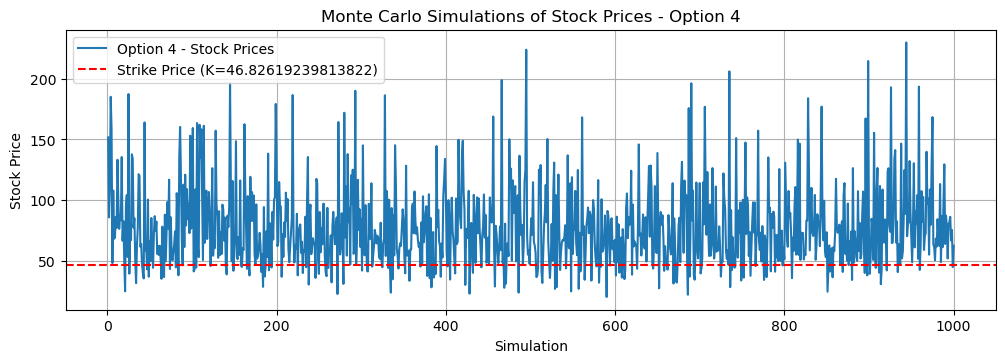

Option 5:
Stock Price: 82.71390558111398
Strike Price: 143.99783690790403
Time to Expiration: 0.9469408855954657 years
Risk-Free Rate: 0.04912816536328025
Volatility: 0.28863573876464843
Black-Scholes Price: 0.4155972235555767
Binomial Tree Price: 0.3552259898037407
Monte Carlo Price: 0.3240502357443903
------------------------


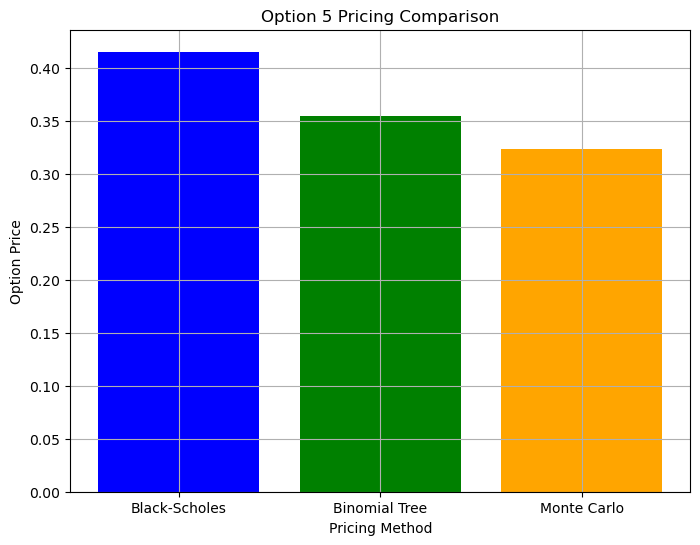

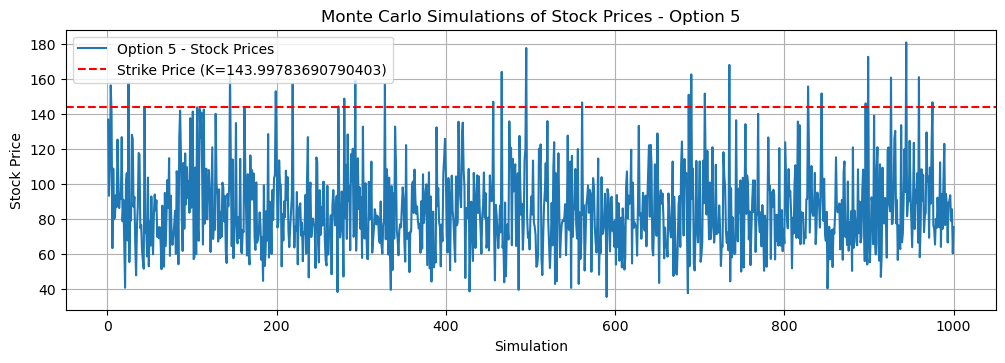

Option 6:
Stock Price: 135.91374909485978
Strike Price: 66.52347950612456
Time to Expiration: 1.3724768382714347 years
Risk-Free Rate: 0.046346510313243515
Volatility: 0.18266763299468564
Black-Scholes Price: 73.49068425926686
Binomial Tree Price: 62.86211064507579
Monte Carlo Price: 72.10713733490276
------------------------


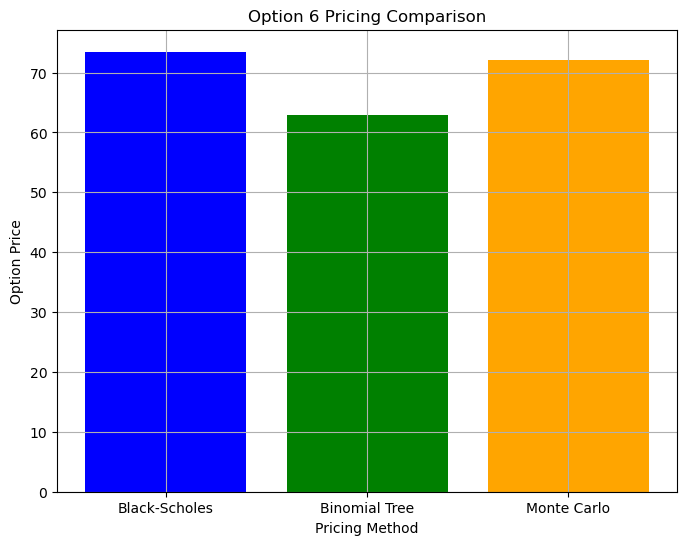

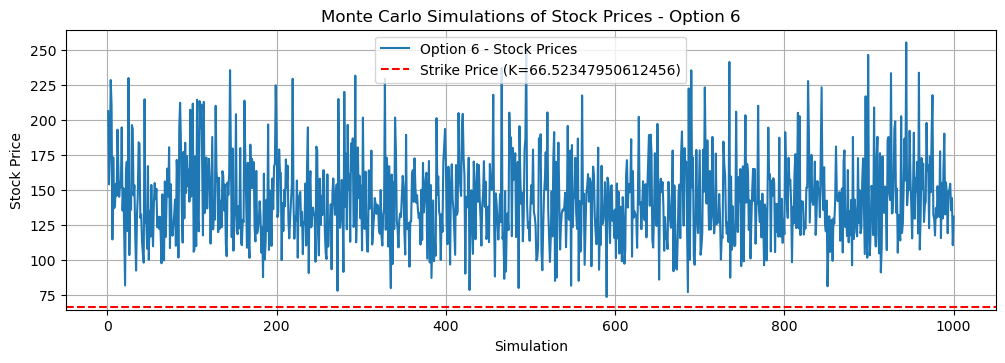

Option 7:
Stock Price: 116.60902130980257
Strike Price: 88.59873376567117
Time to Expiration: 0.2567500944245953 years
Risk-Free Rate: 0.04640612303120627
Volatility: 0.36902418092225886
Black-Scholes Price: 29.571547359172143
Binomial Tree Price: 30.81380549088186
Monte Carlo Price: 28.55487090959116
------------------------


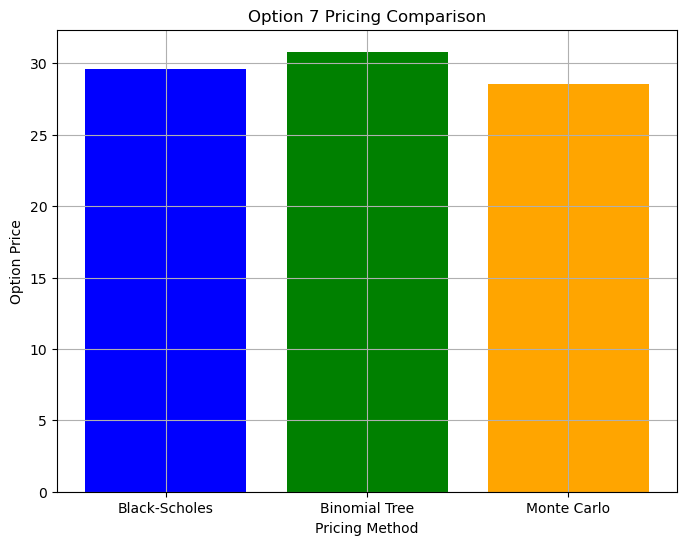

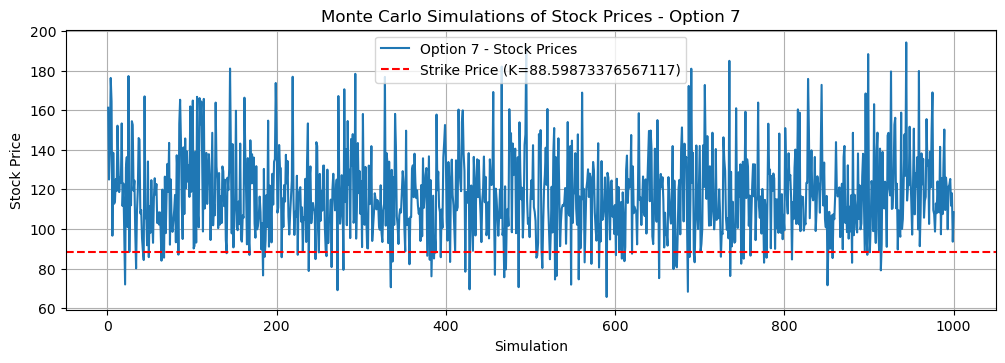

Option 8:
Stock Price: 104.11622122834038
Strike Price: 77.93157652218505
Time to Expiration: 1.8044873019649152 years
Risk-Free Rate: 0.031010226844285817
Volatility: 0.16206741140300956
Black-Scholes Price: 30.88007490050005
Binomial Tree Price: 24.773857614629637
Monte Carlo Price: 29.814550420990468
------------------------


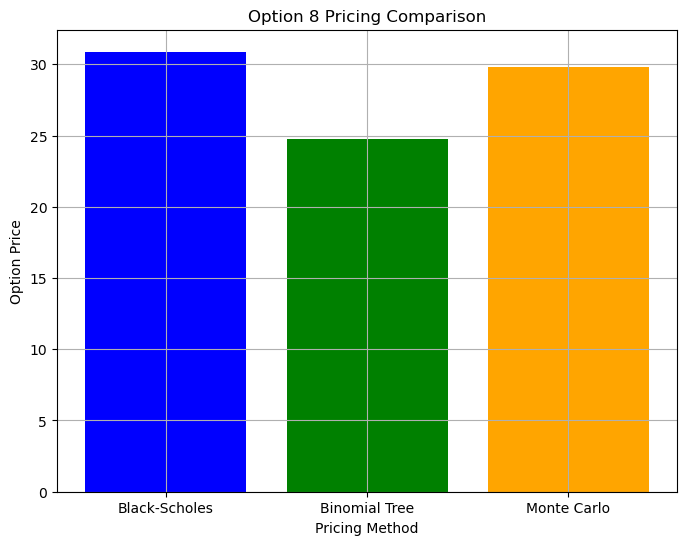

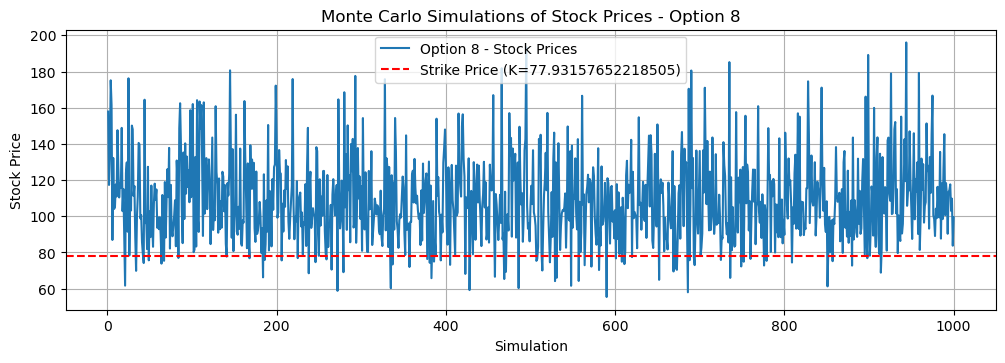

Option 9:
Stock Price: 52.90138244243604
Strike Price: 49.19952399957367
Time to Expiration: 0.6662066513086491 years
Risk-Free Rate: 0.014160757994190516
Volatility: 0.2213215729226223
Black-Scholes Price: 6.108383189108398
Binomial Tree Price: 6.628265386763927
Monte Carlo Price: 5.725540891560858
------------------------


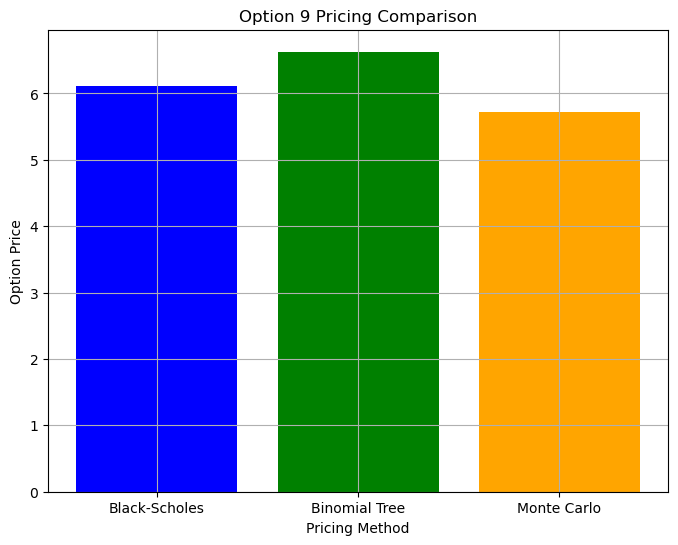

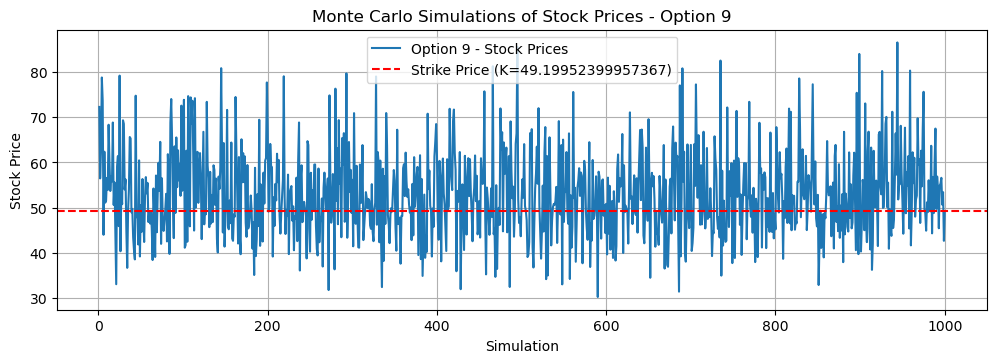

Option 10:
Stock Price: 123.3748296280283
Strike Price: 141.18696330756455
Time to Expiration: 0.5983791629331248 years
Risk-Free Rate: 0.01723658381031604
Volatility: 0.39807174771823106
Black-Scholes Price: 9.202508584261757
Binomial Tree Price: 13.466438530353674
Monte Carlo Price: 8.47370614240016
------------------------


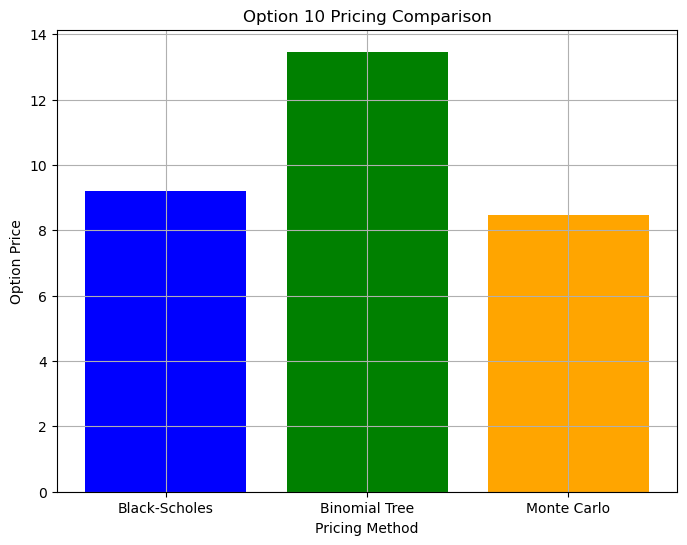

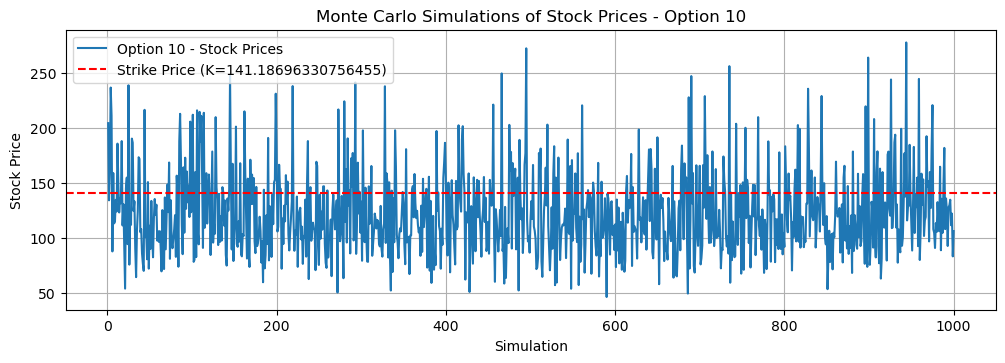

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def generate_option_data(num_options):
    """
    Function to generate synthetic option data for a given number of options.

    Parameters:
    - num_options (int): Number of options to generate.

    Returns:
    - option_data (DataFrame): DataFrame containing generated option data.
    """
    # Set random seed for reproducibility
    np.random.seed(43)

    # Generate realistic option data
    stock_prices = np.random.uniform(50, 150, num_options)  # Random stock prices between 50 and 150
    strike_prices = np.random.uniform(40, 160, num_options)  # Random strike prices between 40 and 160
    time_to_expiration = np.random.uniform(0.1, 2.0, num_options)  # Random time to expiration (years)
    risk_free_rates = np.random.uniform(0.01, 0.05, num_options)  # Random risk-free rates (annual)
    volatilities = np.random.uniform(0.1, 0.4, num_options)  # Random volatilities

    # Create DataFrame to store option data
    option_data = pd.DataFrame({
        'Stock Price': stock_prices,
        'Strike Price': strike_prices,
        'Time to Expiration': time_to_expiration,
        'Risk-Free Rate': risk_free_rates,
        'Volatility': volatilities
    })
    
    return option_data  # Return the generated option data DataFrame


def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Function to calculate the Black-Scholes option price.

    Parameters:
    - S (float): Current stock price.
    - K (float): Strike price of the option.
    - T (float): Time to expiration (in years).
    - r (float): Risk-free interest rate (annual).
    - sigma (float): Volatility of the stock.
    - option_type (str): Type of option ('call' or 'put').

    Returns:
    - option_price (float): Black-Scholes option price.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price


def binomial_tree(S, K, T, r, sigma, steps, option_type='call'):
    """
    Function to calculate the Binomial Tree option price.

    Parameters:
    - S (float): Current stock price.
    - K (float): Strike price of the option.
    - T (float): Time to expiration (in years).
    - r (float): Risk-free interest rate (annual).
    - sigma (float): Volatility of the stock.
    - steps (int): Number of steps in the binomial tree.
    - option_type (str): Type of option ('call' or 'put').

    Returns:
    - option_price (float): Binomial Tree option price.
    """
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Initialize the stock price tree
    stock_tree = np.zeros((steps + 1, steps + 1))
    stock_tree[0, 0] = S
    
    for i in range(1, steps + 1):
        stock_tree[i, 0] = stock_tree[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_tree[i, j] = stock_tree[i - 1, j - 1] * d
    
    # Calculate option values at expiration
    option_tree = np.maximum(0, stock_tree - K) if option_type == 'call' else np.maximum(0, K - stock_tree)
    
    # Calculate option prices backward
    for i in range(steps - 1, -1, -1):
        for j in range(i + 1):
            option_tree[i, j] = np.exp(-r * dt) * (p * option_tree[i + 1, j + 1] + (1 - p) * option_tree[i + 1, j])
    
    return option_tree[0, 0]


def monte_carlo(S, K, T, r, sigma, num_simulations, option_type='call'):
    """
    Function to calculate the Monte Carlo option price and return individual stock prices.

    Parameters:
    - S (float): Current stock price.
    - K (float): Strike price of the option.
    - T (float): Time to expiration (in years).
    - r (float): Risk-free interest rate (annual).
    - sigma (float): Volatility of the stock.
    - num_simulations (int): Number of Monte Carlo simulations.
    - option_type (str): Type of option ('call' or 'put').

    Returns:
    - option_price (float): Monte Carlo option price.
    - stock_prices (numpy array): Array of simulated stock prices.
    """
    np.random.seed(0)
    z = np.random.normal(size=(num_simulations,))
    stock_prices = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
    
    if option_type == 'call':
        payoff = np.maximum(stock_prices - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - stock_prices, 0)
    
    option_price = np.exp(-r * T) * payoff.mean()
    
    return option_price, stock_prices


# Generate sample option data
num_options = 10
option_data = generate_option_data(num_options)

# Iterate over each option and calculate/print prices
for index, row in option_data.iterrows():
    S = row['Stock Price']
    K = row['Strike Price']
    T = row['Time to Expiration']
    r = row['Risk-Free Rate']
    sigma = row['Volatility']
    
    # Calculate Black-Scholes, Binomial Tree, and Monte Carlo option prices
    bs_price = black_scholes(S, K, T, r, sigma)
    binomial_price = binomial_tree(S, K, T, r, sigma, steps=100)
    mc_price, mc_stock_prices = monte_carlo(S, K, T, r, sigma, num_simulations=1000)
    
    # Print option details and calculated prices
    print(f"Option {index + 1}:")
    print(f"Stock Price: {S}")
    print(f"Strike Price: {K}")
    print(f"Time to Expiration: {T} years")
    print(f"Risk-Free Rate: {r}")
    print(f"Volatility: {sigma}")
    print(f"Black-Scholes Price: {bs_price}")
    print(f"Binomial Tree Price: {binomial_price}")
    print(f"Monte Carlo Price: {mc_price}")
    print("------------------------")
    
    # Plot option prices using bar plots
    methods = ['Black-Scholes', 'Binomial Tree', 'Monte Carlo']
    prices = [bs_price, binomial_price, mc_price]
    plt.figure(figsize=(8, 6))
    plt.bar(methods, prices, color=['blue', 'green', 'orange'])
    plt.xlabel('Pricing Method')
    plt.ylabel('Option Price')
    plt.title(f'Option {index + 1} Pricing Comparison')
    plt.grid(True)
    plt.show()
    
    # Plot simulated stock prices for the current option
    plt.figure(figsize=(12, 8)) 
    plt.subplot(2, 1, 1)
    plt.plot(range(1, 1000 + 1), mc_stock_prices, label=f"Option {index + 1} - Stock Prices")
    plt.axhline(y=K, color='r', linestyle='--', label=f"Strike Price (K={K})")
    plt.xlabel('Simulation')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulations of Stock Prices - Option {index + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
# Define the output file name for printed details
output_file = 'output.txt'

# Open the output file in 'w' mode to write (create a new file if it doesn't exist)
with open(output_file, 'w') as f:
    # Iterate over each option and calculate/print prices
    for index, row in option_data.iterrows():
        S = row['Stock Price']
        K = row['Strike Price']
        T = row['Time to Expiration']
        r = row['Risk-Free Rate']
        sigma = row['Volatility']
        
        # Calculate Black-Scholes, Binomial Tree, and Monte Carlo option prices
        bs_price = black_scholes(S, K, T, r, sigma)
        binomial_price = binomial_tree(S, K, T, r, sigma, steps=100)
        mc_price, mc_stock_prices = monte_carlo(S, K, T, r, sigma, num_simulations=1000)
        
        # Write option details and calculated prices to the output file
        f.write(f"Option {index + 1}:\n")
        f.write(f"Stock Price: {S}\n")
        f.write(f"Strike Price: {K}\n")
        f.write(f"Time to Expiration: {T} years\n")
        f.write(f"Risk-Free Rate: {r}\n")
        f.write(f"Volatility: {sigma}\n")
        f.write(f"Black-Scholes Price: {bs_price}\n")
        f.write(f"Binomial Tree Price: {binomial_price}\n")
        f.write(f"Monte Carlo Price: {mc_price} (based on {1000} simulations)\n")
        f.write("------------------------\n")
        
        # Plot option prices using bar plots and save as PNG
        plt.figure(figsize=(8, 6))
        methods = ['Black-Scholes', 'Binomial Tree', 'Monte Carlo']
        prices = [bs_price, binomial_price, mc_price]
        plt.bar(methods, prices, color=['blue', 'green', 'orange'])
        plt.xlabel('Pricing Method')
        plt.ylabel('Option Price')
        plt.title(f'Option {index + 1} Pricing Comparison')
        plt.grid(True)
        plt.savefig(f'option_{index + 1}_pricing_comparison.png')  # Save the plot as PNG
        plt.close()  # Close the current figure to free up memory
        
        # Plot simulated stock prices and save as PNG
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 1, 1)
        plt.plot(range(1, 1000 + 1), mc_stock_prices, label=f"Option {index + 1} - Stock Prices")
        plt.axhline(y=K, color='r', linestyle='--', label=f"Strike Price (K={K})")
        plt.xlabel('Simulation')
        plt.ylabel('Stock Price')
        plt.title(f'Monte Carlo Simulations of Stock Prices - Option {index + 1}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'option_{index + 1}_stock_prices.png')  # Save the plot as PNG
        plt.close()  # Close the current figure to free up memory
